# Modelo poblacional: crecimiento cuadrático [rk]

<b>Deadline:</b> Friday, 15 de April de 2022, 23:59

Dada la siguiente función de actualización / step de crecimiento neto cuadrático para el modelo poblacional:
```
def step_cuadratico(pop, t, sistema):
    crecimiento_neto = sistema.alpha * pop[t] + sistema.beta * pop[t]**2
    return pop[t] + crecimiento_neto
```
Reescribirla utilizando la notación de r y K, donde:

- r: es la mayor tasa de crecimiento del modelo.
- K: capacidad de carga del modelo.


<b>Requisitos de la entrega</b>:
La entrega deberá cumplir los siguientes requisitos:
- El código deberá ser presentado en un repositorio git
- Se creará un tag/release para la versión "estable" del programa entregable. El tag deberá ser creado antes de la fecha límite de presentación.

Además del código propiamente dicho, y convenientemente ordenado, deberá contar con los siguientes archivos en el repositorio GIT:

- <b>INSTALL.md</b>: contendrá las instrucciones para clonar e instalar/lanzar la aplicación.
- <b>README.md</b>: contendrá la ayuda y uso básico de la aplicación.
- <b>README.info</b>: contendrá un informe sobre las decisiones principales de diseñodel sistema, y su justificación (por qué usar tal o cual método, paquete, módulo, etc, y cómo se implementaron las reglas del juego de la vida.
- <b>README.todo</b>: contendrá una lista detallada de mejoras características/features del sistema para futuras correcciones y versiones.

In [10]:
import modsim as ms
import pandas
import matplotlib as plt
from matplotlib import pyplot

## Modelo poblacional cuadratico previo

En el modelo poblacional cuadratico previo, se define la siguiente formula para calcular el crecimiento poblacional neto de una manera mas realista:

```
crecimiento_neto = sistema.alpha * pop[t] + sistema.beta * pop[t]**2
```
Donde `alpha` y `beta` representan las raices del modelo cuadratico.

Entonces:

In [11]:
def step_cuadratico(pop, t, sistema):
    crecimiento_neto = sistema.alpha * pop[t] + sistema.beta * pop[t]**2
    return pop[t] + crecimiento_neto

In [12]:
# Funcion que incrementa los valores de la poblacion
def run_simulation(sistema, step_func):
    resultado = ms.TimeSeries()
    resultado[sistema.t_0] = sistema.p_0
    
    for t in ms.linrange(sistema.t_0, sistema.t_end):
        resultado[t+1] = step_func(resultado, t, sistema)

    return resultado

In [13]:
def plot_resultado(censo, un, resultado, titulo):
    pyplot.clf()
    ms.plot(resultado, '-', label="Modelo")
    ms.plot(censo, ':', label="Censo EEUU")
    ms.plot(un, '--', label="Censo Naciones Unidas")
    ms.decorate(title=titulo, xlabel='Año', ylabel='Poblacion en miles de millones')
    pyplot.show()

In [14]:
wiki = "https://en.wikipedia.org/wiki/Estimates_of_historical_world_population"

tablas = pandas.read_html(wiki, header=0,index_col=0, decimal='M')

# Traemos los datos
tabla2 = tablas[2]
tabla2.columns = ['census', 'prb', 'un', 'maddison', 'hyde', 'tanton', 'biraben', 'mj','thomlinson', 'durand', 'clark' ]

censo = tabla2.census/1e9
un = tabla2.un/1e9

tabla2

,census,prb,un,maddison,hyde,tanton,biraben,mj,thomlinson,durand,clark
Year,,,,,,,,,,,
1950,2557628654,2.516000e+09,2.525149e+09,2.544000e+09,2.527960e+09,2.400000e+09,2.527000e+09,2.500000e+09,2.400000e+09,NaN,2.486000e+09
1951,2594939877,NaN,2.572851e+09,2.571663e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1952,2636772306,NaN,2.619292e+09,2.617949e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1953,2682053389,NaN,2.665865e+09,2.665959e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1954,2730228104,NaN,2.713172e+09,2.716927e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2012,7013871313,7.057075e+09,7.080072e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,7092128094,7.136796e+09,7.162119e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014,7169968185,7.238184e+09,7.243784e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


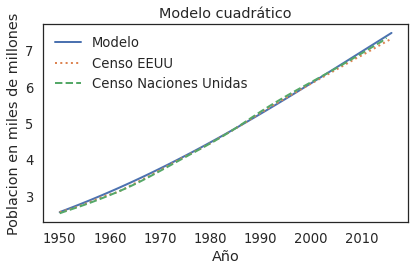

In [15]:
t_0 = ms.get_first_label(censo)
t_end = ms.get_last_label(censo)
p_0 = censo[t_0]
p_end = censo[t_end]

diferencia_tiempo = t_end - t_0
crecimiento_total = p_end - p_0
crecimiento_anual = crecimiento_total / diferencia_tiempo

sistema = ms.System(
        t_0 = t_0,
        t_end = t_end,
        crecimiento_anual = crecimiento_anual,
        p_0 = p_0,
        tasa_nat = 0.027,
        tasa_mort = 0.01,
        alpha = 0.025,
        beta = -0.0018)


res = run_simulation(sistema, step_cuadratico)
plot_resultado(censo, un, res, "Modelo cuadrático")

## Reescribiendo la funcion step
Para interpretar la funcion mas facilmente, definimos a `r` como la tasa máxima de crecimiento del modelo y a `K` como capacidad de carga del modelo, es decir, la capacidad máxima que el modelo puede sustentar. A ambas variables las definimos de la siguiente manera:

$$
r = \alpha \newline
K = - \alpha / \beta
$$

Nos queda entonces una funcion incremento resultante mas facil de implementar descrita de la siguiente manera:

In [19]:
def step_cuadratico_nuevo(pop, t, sistema):
    r = sistema.alpha
    K = - sistema.alpha / sistema.beta
    crecimiento_neto = r * pop[t] * (1 - pop[t] / K)
    return pop[t] + crecimiento_neto

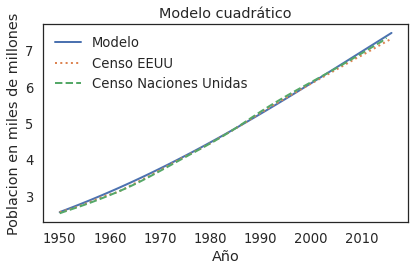

In [20]:
res = run_simulation(sistema, step_cuadratico_nuevo)
plot_resultado(censo, un, res, "Modelo cuadrático")

La funcion no modifica los valores. Permite plantear mas facilmente el incremento.